<h1> Bears. Beets. Battlestar Galactica.</h1>

#1. Import libraries

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import itertools

In [ ]:
#plot size adjustment
%matplotlib inline
sns.set_style('dark')

# 2. Import dataset

In [ ]:
import glob

# Importing drive method from colab for accessing google drive
from google.colab import drive

# Mounting drive
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The complete script of The Office (U.S.) comes from this Kaggle dataset:
https://www.kaggle.com/nasirkhalid24/the-office-us-complete-dialoguetranscript

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/the_office/The-Office-Lines-V3.csv', encoding = "ISO-8859-1")

#3. Data overview and preparation

In [ ]:
df.shape

(54626, 6)

In [ ]:
df.head(5)

season  episode  ...  speaker                                               line
0       1        1  ...  Michael  All right Jim. Your quarterlies look very good...
1       1        1  ...      Jim         Oh, I told you. I couldn't close it. So...
2       1        1  ...  Michael  So you've come to the master for guidance? Is ...
3       1        1  ...      Jim         Actually, you called me in here, but yeah.
4       1        1  ...  Michael    All right. Well, let me show you how it's done.

[5 rows x 6 columns]

In [ ]:
#fix some typos in names
name_conversion = {'David': 'David Wallace',
                   'Michael: ' : 'Michael',
                   'DeAngelo': 'Deangelo',
                   'Daryl':'Darryl',
                   'Todd': 'Todd Packer',
                   'Packer': 'Todd Packer',
                   'Andy: ' : 'Andy',
                   'Dwight: ': 'Dwight',
                   'Jim: ': 'Jim',
                   'Pam: ': 'Pam',
                   'Oscar: ': 'Oscar',
                   "Pam's Mom": 'Helene',
                   "Pam's mom": 'Helene',
                   'Angela: ' : 'Angela',
                   'Ryan Howard': 'Ryan',
                   'Bob': 'Bob Vance',
                   'Erin: ' : 'Erin',
                   'Robert California': 'Robert',
                   'Carroll': 'Carol'
                   }

In [ ]:
df['speaker'] = df['speaker'].replace(name_conversion)

#Get a distribution of name of occurences

In [ ]:
names = df['speaker'].value_counts(ascending=False).to_frame()

In [ ]:
#names.to_csv('names.csv')

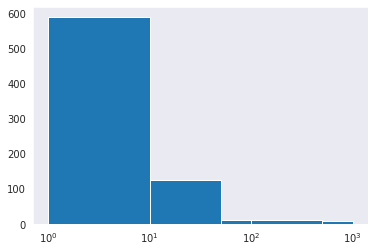

In [ ]:
bins=[1, 10, 50, 100, 500, 1000]
plt.hist(names['speaker'], bins=bins)
plt.xscale('log')


Only keep speaker with lines > 100.

In [ ]:
mn = names[names['speaker']>50]

In [ ]:
df2 = df.loc[df['speaker'].isin(mn.index)]

In [ ]:
df2.shape

(50846, 6)

season-scene key

In [ ]:
ssk = df2[['season', 'scene']].groupby('scene')['season'].agg(pd.Series.mode).to_frame()

 scene-character key

In [ ]:
sc = df2[['scene','speaker']].groupby('scene')['speaker'].agg(lambda x: set(x)).to_frame()


In [ ]:
sc = sc['speaker'].map(lambda p: tuple(p)).to_frame()

In [ ]:
sck = sc.merge(ssk, how='left', left_index=True, right_index=True)

In [ ]:
sck['scene'] = sck.index

In [ ]:
#add a column: number of speakers in each scene
sck['nspeaker'] = sck['speaker'].apply(len)

In [ ]:
#Scene key
sck.head(20)

speaker  season  scene  nspeaker
scene                                                      
1                   (Michael, Jim)       1      1         2
2                       (Michael,)       1      2         1
3                   (Michael, Pam)       1      3         2
4                       (Michael,)       1      4         1
5                        (Dwight,)       1      5         1
6                           (Jim,)       1      6         1
7           (Michael, Dwight, Jim)       1      7         3
8                           (Jan,)       1      8         1
9                       (Michael,)       1      9         1
10             (Michael, Jan, Pam)       1     10         3
11     (Michael, Jan, Todd Packer)       1     11         3
12              (Stanley, Phyllis)       1     12         2
13                        (Oscar,)       1     13         1
14                 (Kevin, Angela)       1     14         2
15                      (Pam, Jim)       1     15         2
16                      (Michael,)       1     16         1
17            (Michael, Pam, Ryan)       1     17         3
18                          (Pam,)       1     18         1
19                   (Dwight, Jim)       1     19         2
20                       (Dwight,)       1     20         1

In [ ]:
sck.shape

(8081, 4)

In [ ]:
sck['speaker'].value_counts().head(20)

(Michael,)           812
(Dwight,)            465
(Jim,)               331
(Pam,)               317
(Pam, Jim)           280
(Andy,)              251
(Michael, Dwight)    238
(Dwight, Jim)        165
(Kevin,)             106
(Dwight, Angela)      81
(Oscar,)              81
(Michael, Jim)        79
(Darryl,)             76
(Andy, Erin)          76
(Michael, Jan)        74
(Erin,)               74
(Michael, Pam)        72
(Angela,)             71
(Toby,)               62
(Ryan,)               61
Name: speaker, dtype: int64

In [ ]:
#a dataframe of only monologue scenes
sck_m = sck.loc[sck['nspeaker']==1]

In [ ]:
#a dataframe of only non-monologue scenes 
sck_n = sck.loc[sck['nspeaker']>1]

In [ ]:
sck_m['speaker'].value_counts().head(10)

(Michael,)    812
(Dwight,)     465
(Jim,)        331
(Pam,)        317
(Andy,)       251
(Kevin,)      106
(Oscar,)       81
(Darryl,)      76
(Erin,)        74
(Angela,)      71
Name: speaker, dtype: int64

In [ ]:
sck_n['speaker'].value_counts().head(10)

(Pam, Jim)           280
(Michael, Dwight)    238
(Dwight, Jim)        165
(Dwight, Angela)      81
(Michael, Jim)        79
(Andy, Erin)          76
(Michael, Jan)        74
(Michael, Pam)        72
(Michael, Ryan)       53
(Michael, Holly)      53
Name: speaker, dtype: int64

#4. Frequency analysis

In [ ]:
gm = sck_m['speaker'].value_counts().head(10).sort_values(ascending=True)

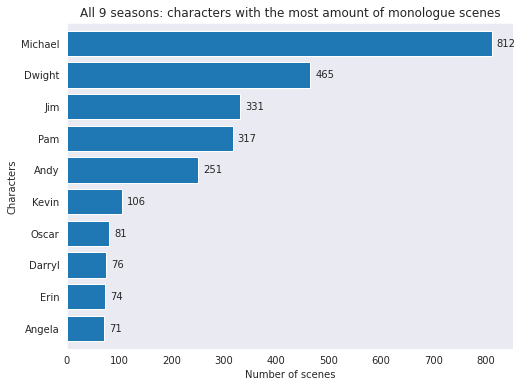

In [ ]:
f,ax=plt.subplots(figsize=(8,6))
gm.plot.barh(width=0.8)
ax.set_title('All 9 seasons: characters with the most amount of monologue scenes')
ax.set_xlabel('Number of scenes')
ax.set_ylabel('Characters')
y_labels = gm.index.map(lambda x: list(x)[0])
ax.set_yticklabels(y_labels)

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = int(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
  
#plt.show()
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/monologues.png')

In [ ]:
gn = sck_n['speaker'].value_counts().head(10).sort_values(ascending=True)

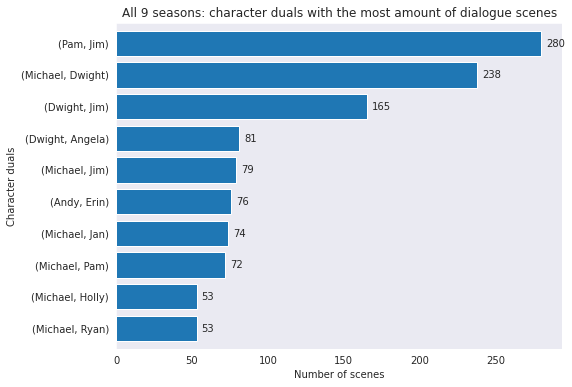

In [ ]:
f,ax=plt.subplots(figsize=(8,6))
gn.plot.barh(width=0.8)
ax.set_title('All 9 seasons: character duals with the most amount of dialogue scenes')
ax.set_xlabel('Number of scenes')
ax.set_ylabel('Character duals')

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = int(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
  
#plt.show()
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/dialogues.png')

#5. Network analysis

## Prep

In [ ]:
#dataset by season
s1 = sck_n.loc[sck_n['season']==1]
s2 = sck_n.loc[sck_n['season']==2]
s3 = sck_n.loc[sck_n['season']==3]
s4 = sck_n.loc[sck_n['season']==4]
s5 = sck_n.loc[sck_n['season']==5]
s6 = sck_n.loc[sck_n['season']==6]
s7 = sck_n.loc[sck_n['season']==7]
s8 = sck_n.loc[sck_n['season']==8]
s9 = sck_n.loc[sck_n['season']==9]
sall = sck_n

In [ ]:
s1

speaker  season  scene  nspeaker
scene                                                      
1                   (Michael, Jim)       1      1         2
3                   (Michael, Pam)       1      3         2
7           (Michael, Dwight, Jim)       1      7         3
10             (Michael, Jan, Pam)       1     10         3
11     (Michael, Jan, Todd Packer)       1     11         3
...                            ...     ...    ...       ...
221                (Michael, Ryan)       1    221         2
222                    (Jim, Katy)       1    222         2
223                (Michael, Ryan)       1    223         2
224                     (Pam, Jim)       1    224         2
226           (Michael, Jim, Katy)       1    226         3

[139 rows x 4 columns]

In [ ]:
#graph by season
G1 = nx.Graph()
G2 = nx.Graph()
G3 = nx.Graph()
G4 = nx.Graph()
G5 = nx.Graph()
G6 = nx.Graph()
G7 = nx.Graph()
G8 = nx.Graph()
G9 = nx.Graph()
Gall = nx.Graph()

In [ ]:
seasons = [s1, s2, s3, s4, s5, s6, s7, s8, s9, sall]
graphs = [G1, G2, G3, G4, G5, G6, G7, G8, G9, Gall]

In [ ]:
#create a helper to feed the data into the network graph
def edge_helper(G, df):
  for scene in df.index:
    dundies = df.loc[scene, 'speaker']
    combo = itertools.combinations(dundies, 2)
    for e in combo:
      if G.has_edge(*e) == False:
        G.add_edge(*e, weight=1)
      else:
        G[e[0]][e[1]]['weight'] +=1

In [ ]:
for G, df in zip(graphs, seasons):
  edge_helper(G, df)

## draw

In [ ]:
#create a draw helper to draw each network graph
def draw_helper(G, width_tuning=20, pic_size=8, filter=3):
  #filter tuning: drop characters with scenes < filter
  x = nx.Graph(G)
  for node in x.nodes:
    if G.degree(weight='weight')[node]<=filter:
      G.remove_node(node)
  #tuning the width of the edge based on weights
  weights = [G[u][v]['weight']/width_tuning for u,v in G.edges]
  #draw the network graphs
  plt.subplots(figsize=(pic_size, pic_size))
  pos = nx.spring_layout(G, seed=20)
  nx.draw_networkx_nodes(G, pos, node_size=1200,node_color='#CEA692',node_shape="o", alpha=0.92)
  nx.draw_networkx_edges(G, pos, width=weights, edge_color='#52464A')
  nx.draw_networkx_labels(G, pos, font_size=10)

## Drawing by season

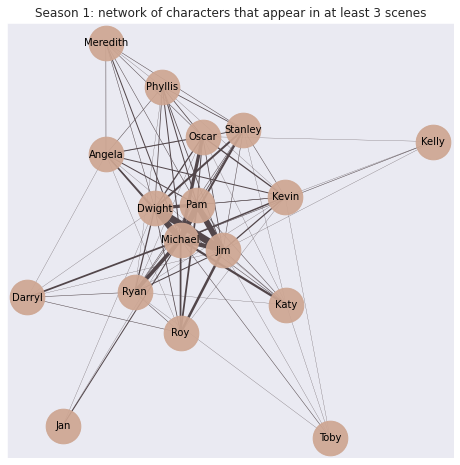

In [ ]:
#Season 1
draw_helper(G1,4,8)
plt.title('Season 1: network of characters that appear in at least 3 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s1-3.png')

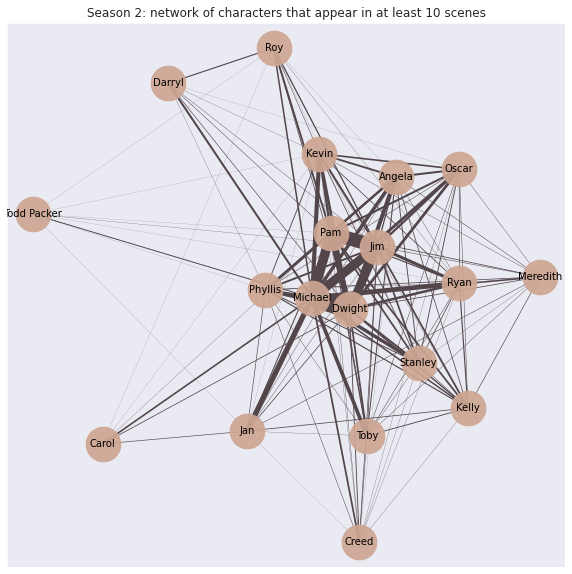

In [ ]:
#Season 2
draw_helper(G2,8,10,10)
plt.title('Season 2: network of characters that appear in at least 10 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s2-10.png')

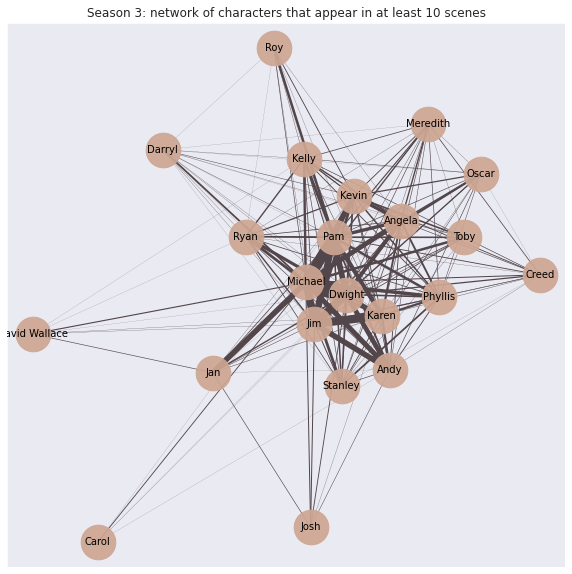

In [ ]:
#Season 3
draw_helper(G3,8,10,10)
plt.title('Season 3: network of characters that appear in at least 10 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s3-10.png')

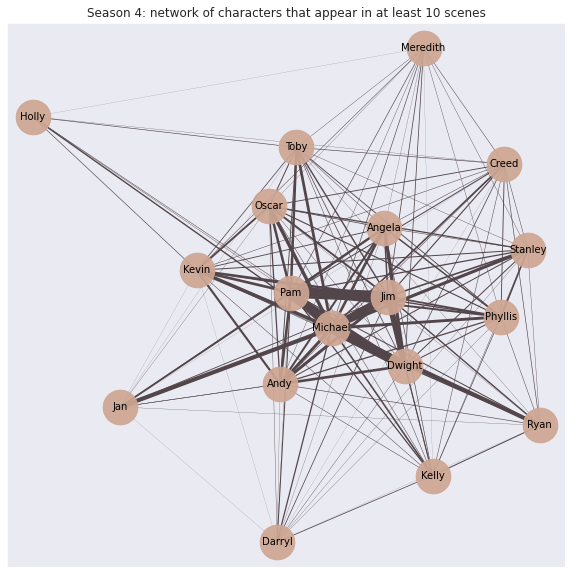

In [ ]:
#Season 4
draw_helper(G4,8,10,10)
plt.title('Season 4: network of characters that appear in at least 10 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s4-10.png')

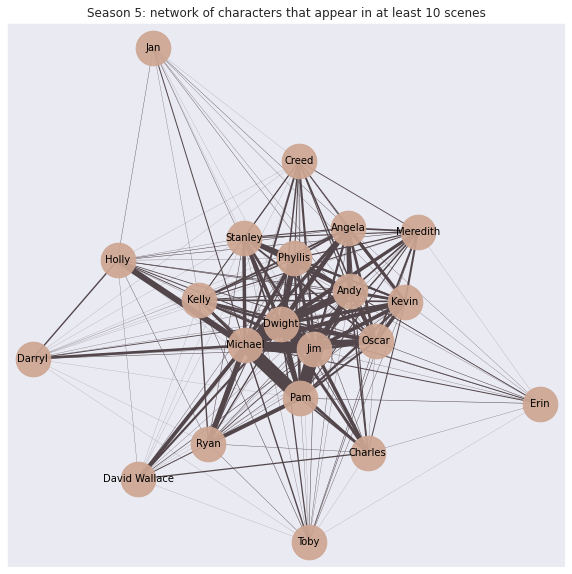

In [ ]:
#Season 5
draw_helper(G5,8,10,10)
plt.title('Season 5: network of characters that appear in at least 10 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s5-10.png')

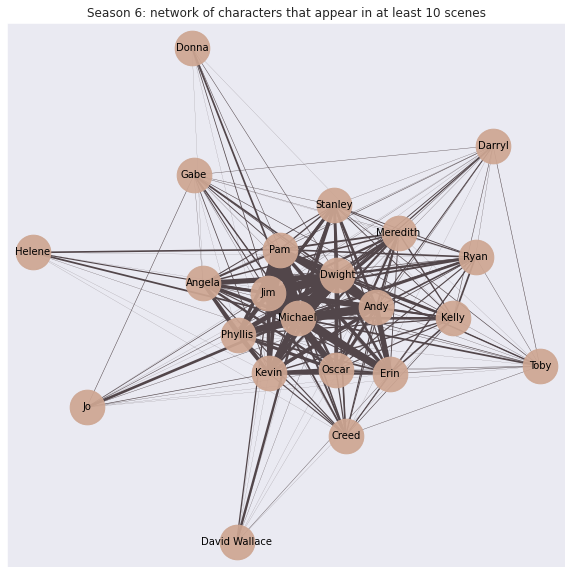

In [ ]:
#Season 6
draw_helper(G6,8,10,10)
plt.title('Season 6: network of characters that appear in at least 10 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s6-10.png')

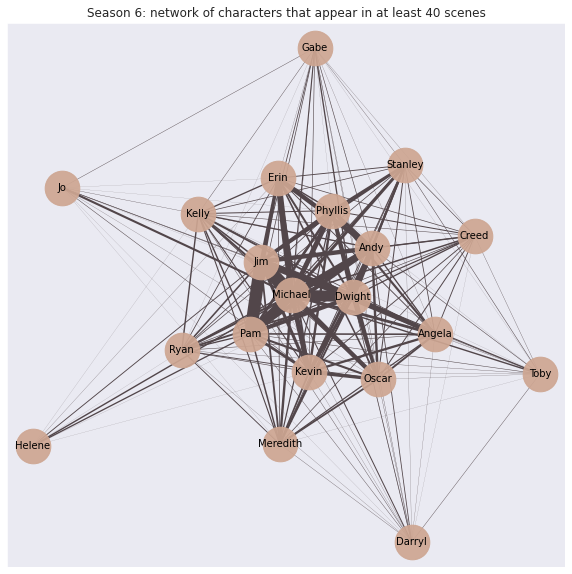

In [ ]:
draw_helper(G6,10,10,40)
plt.title('Season 6: network of characters that appear in at least 40 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s6-40.png')

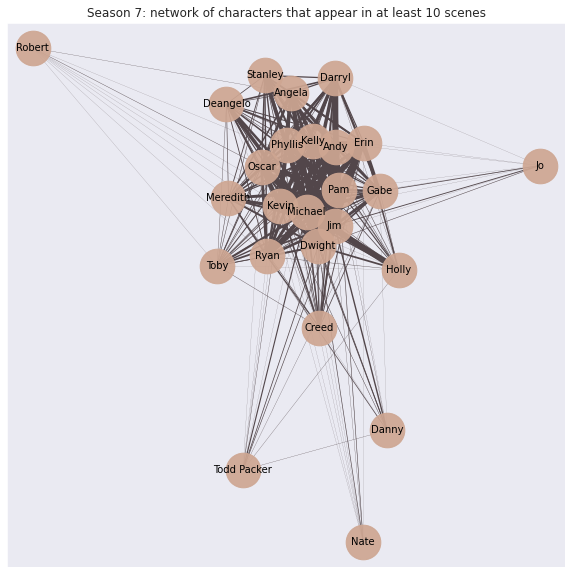

In [ ]:
#Season 7
draw_helper(G7,8,10,10)
plt.title('Season 7: network of characters that appear in at least 10 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s7-10.png')

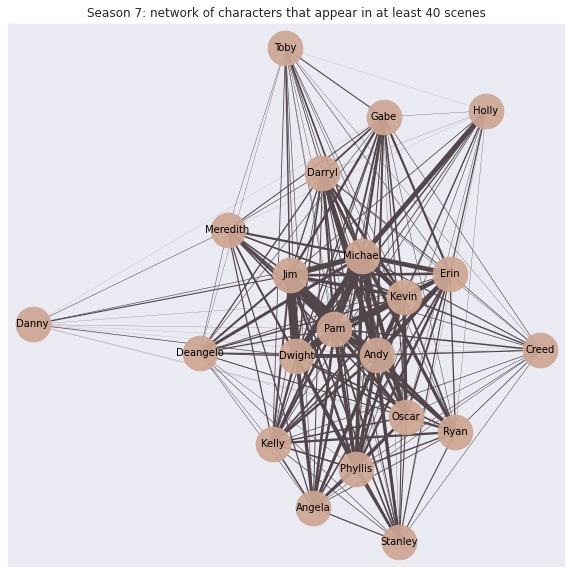

In [ ]:
draw_helper(G7,10,10,40)
plt.title('Season 7: network of characters that appear in at least 40 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s7-40.png')

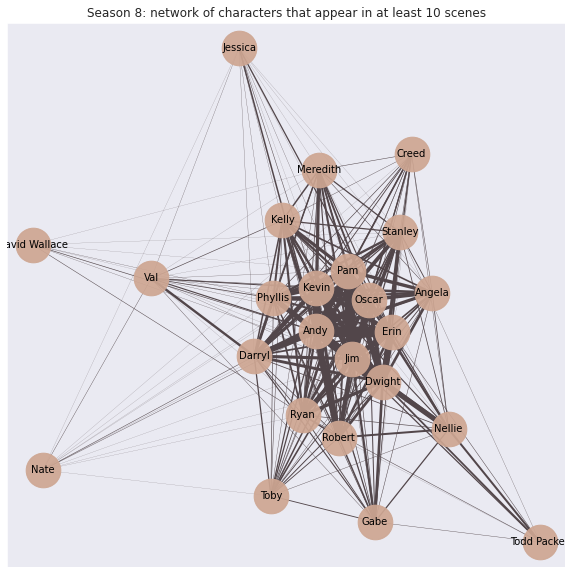

In [ ]:
#Season 8
draw_helper(G8,8,10,10)
plt.title('Season 8: network of characters that appear in at least 10 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s8-10.png')

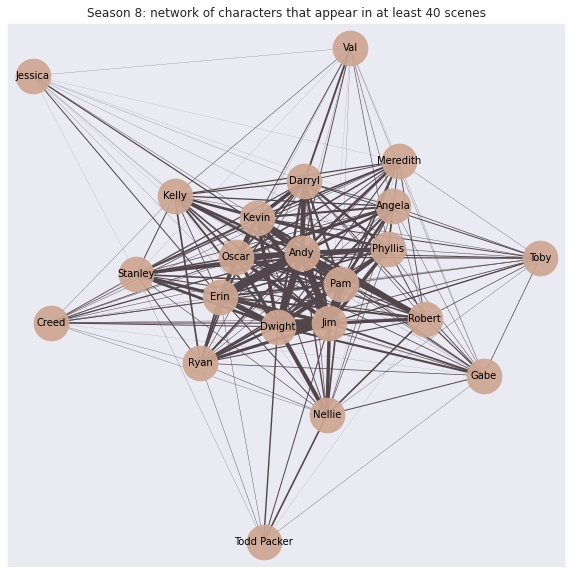

In [ ]:
draw_helper(G8,10,10,40)
plt.title('Season 8: network of characters that appear in at least 40 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s8-40.png')

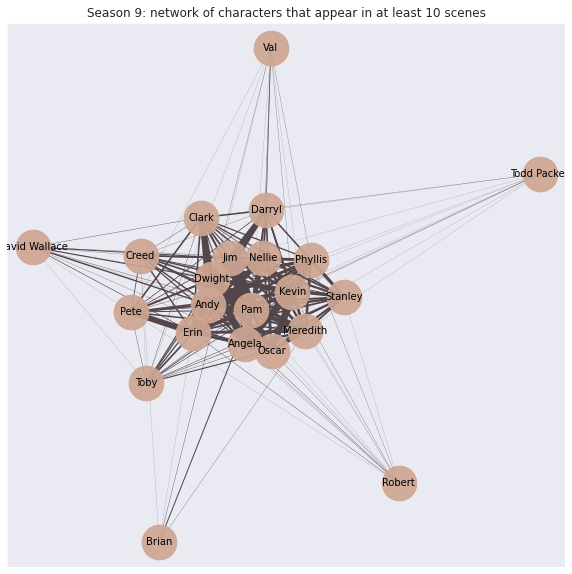

In [ ]:
#Season 9
draw_helper(G9,8,10,10)
plt.title('Season 9: network of characters that appear in at least 10 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s9-10.png')

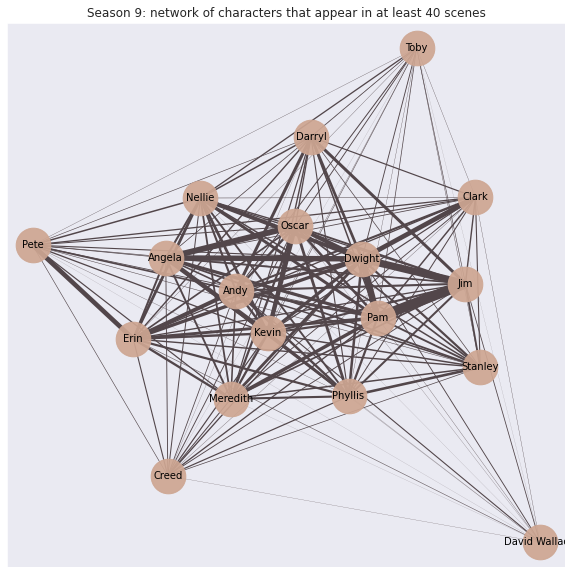

In [ ]:
draw_helper(G9,10,10,40)
plt.title('Season 9: network of characters that appear in at least 40 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/s9-40.png')

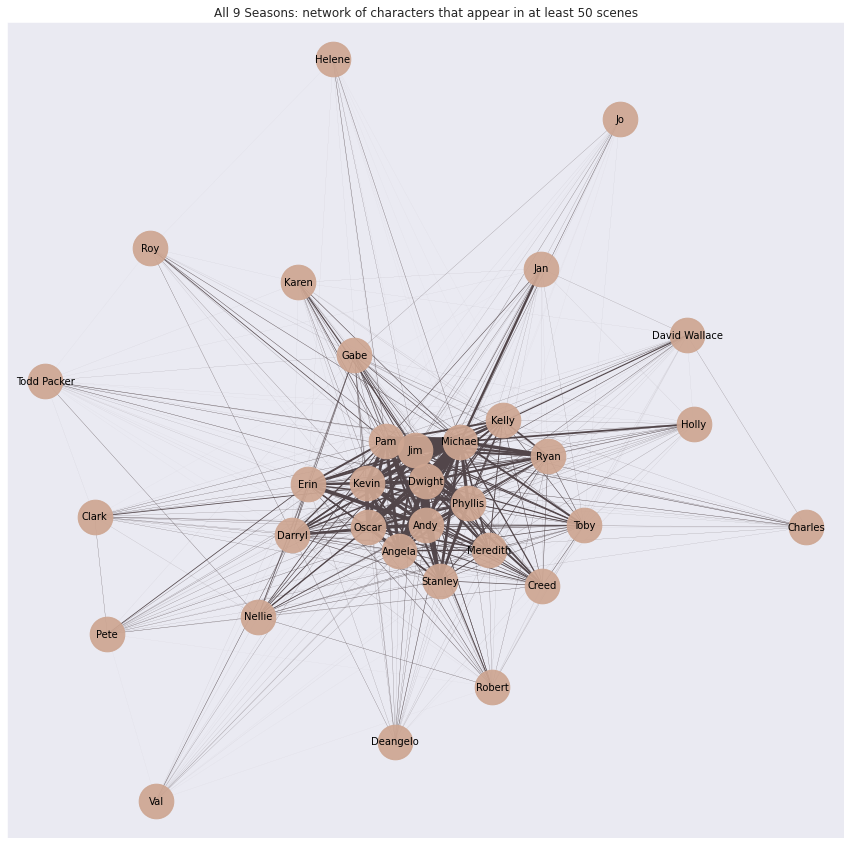

In [ ]:
draw_helper(Gall, 60, 15, 50)
plt.title('All 9 Seasons: network of characters that appear in at least 50 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/all-50.png')

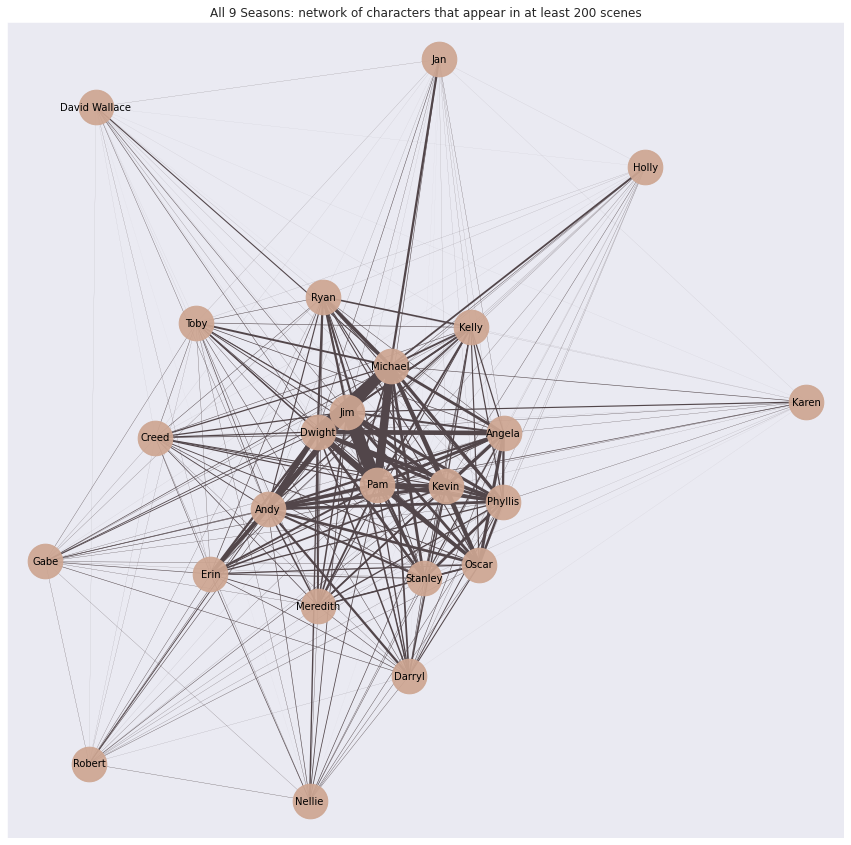

In [ ]:
draw_helper(Gall, 60, 15, 200)
plt.title('All 9 Seasons: network of characters that appear in at least 200 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/all-200.png')

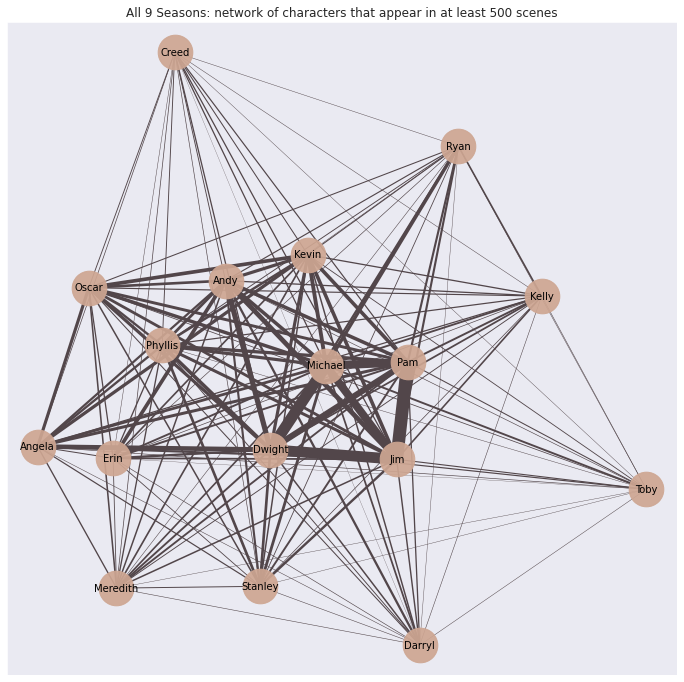

In [ ]:
draw_helper(Gall, 60, 12, 500)
plt.title('All 9 Seasons: network of characters that appear in at least 500 scenes')
plt.savefig('/content/drive/MyDrive/DS - data science prep/Projects/the_office/graphs/all-500.png')